## Natural Language Processing: summarization, search, representation and similarity

### Loading texts from the internet

In [1]:
import spacy 
spacy.__version__

'3.7.4'

In [2]:
import en_core_web_sm

In [4]:
from goose3 import Goose 
g = Goose()
url = 'https://en.wikipedia.org/wiki/Natural_language_processing'
article = g.extract(url)

In [5]:
article.title

'Natural language processing - Wikipedia'

In [6]:
article.cleaned_text

'Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval. It is primarily concerned with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of "understanding"[citation needed] the contents of documents, including the contextual nuances of the language within them. To this end, natural language processing often borrows ideas from theoretical linguistics. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1940s.[1] Already in 1940, Alan Turing published an article titled "Computing Machinery and Intelligence" wh

In [7]:
article.authors

['Contributors to Wikimedia projects']

In [8]:
article.links

['/wiki/File:Question_book-new.svg',
 '/wiki/Wikipedia:Verifiability',
 'https://www.google.com/search?as_eq=wikipedia&q=%22Natural+language+processing%22',
 'https://www.google.com/search?tbm=nws&q=%22Natural+language+processing%22+-wikipedia&tbs=ar:1',
 'https://www.google.com/search?&q=%22Natural+language+processing%22&tbs=bkt:s&tbm=bks',
 'https://www.google.com/search?tbs=bks:1&q=%22Natural+language+processing%22+-wikipedia',
 'https://scholar.google.com/scholar?q=%22Natural+language+processing%22',
 'https://www.jstor.org/action/doBasicSearch?Query=%22Natural+language+processing%22&acc=on&wc=on',
 '/wiki/Special:EditPage/Natural_language_processing',
 '/wiki/Help:Referencing_for_beginners',
 '/wiki/Help:Maintenance_template_removal',
 '/wiki/NLP_(disambiguation)',
 '/wiki/Language_processing_in_the_brain',
 '/wiki/Interdisciplinary',
 '/wiki/Computer_science',
 '/wiki/Information_retrieval',
 '/wiki/Natural_language',
 '/wiki/Text_corpus',
 '/wiki/Machine_learning',
 '/wiki/Wikip

### Named entity Recognition

In [9]:
nlp = spacy.load('en_core_web_sm')
nlp

In [10]:
document = nlp(article.cleaned_text)

In [11]:
for token in document:
    print(token.text, ' - ', token.pos_)

Natural  -  ADJ
language  -  NOUN
processing  -  NOUN
(  -  PUNCT
NLP  -  PROPN
)  -  PUNCT
is  -  AUX
an  -  DET
interdisciplinary  -  ADJ
subfield  -  NOUN
of  -  ADP
computer  -  NOUN
science  -  NOUN
and  -  CCONJ
information  -  NOUN
retrieval  -  NOUN
.  -  PUNCT
It  -  PRON
is  -  AUX
primarily  -  ADV
concerned  -  VERB
with  -  ADP
giving  -  VERB
computers  -  NOUN
the  -  DET
ability  -  NOUN
to  -  PART
support  -  VERB
and  -  CCONJ
manipulate  -  VERB
human  -  ADJ
language  -  NOUN
.  -  PUNCT
It  -  PRON
involves  -  VERB
processing  -  VERB
natural  -  ADJ
language  -  NOUN
datasets  -  NOUN
,  -  PUNCT
such  -  ADJ
as  -  ADP
text  -  NOUN
corpora  -  PROPN
or  -  CCONJ
speech  -  PROPN
corpora  -  PROPN
,  -  PUNCT
using  -  VERB
either  -  CCONJ
rule  -  NOUN
-  -  PUNCT
based  -  VERB
or  -  CCONJ
probabilistic  -  ADJ
(  -  PUNCT
i.e.  -  X
statistical  -  ADJ
and  -  CCONJ
,  -  PUNCT
most  -  ADV
recently  -  ADV
,  -  PUNCT
neural  -  ADJ
network  -  NOUN
-  - 

In [12]:
from spacy import displacy 
displacy.render(document, style =  'ent', jupyter=True)

In [13]:
for entity in document.ents:
    if entity.label_ == 'PERSON':
        print(entity.text)

Alan Turing
John Searle's
Joseph Weizenbaum
Ross Quillian's
SAM
Wilensky
QUALM
Lehnert
Lehnert
Lesk
Jabberwacky
Chomskyan
Yoshua Bengio
Tomáš Mikolov
Markov
George Lakoff
Lakoff
Karl J. Friston


### Most frequent words

In [14]:
import nltk

In [15]:
tokens = nltk.tokenize.word_tokenize(article.cleaned_text)

In [16]:
tokens

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'is',
 'an',
 'interdisciplinary',
 'subfield',
 'of',
 'computer',
 'science',
 'and',
 'information',
 'retrieval',
 '.',
 'It',
 'is',
 'primarily',
 'concerned',
 'with',
 'giving',
 'computers',
 'the',
 'ability',
 'to',
 'support',
 'and',
 'manipulate',
 'human',
 'language',
 '.',
 'It',
 'involves',
 'processing',
 'natural',
 'language',
 'datasets',
 ',',
 'such',
 'as',
 'text',
 'corpora',
 'or',
 'speech',
 'corpora',
 ',',
 'using',
 'either',
 'rule-based',
 'or',
 'probabilistic',
 '(',
 'i.e',
 '.',
 'statistical',
 'and',
 ',',
 'most',
 'recently',
 ',',
 'neural',
 'network-based',
 ')',
 'machine',
 'learning',
 'approaches',
 '.',
 'The',
 'goal',
 'is',
 'a',
 'computer',
 'capable',
 'of',
 '``',
 'understanding',
 "''",
 '[',
 'citation',
 'needed',
 ']',
 'the',
 'contents',
 'of',
 'documents',
 ',',
 'including',
 'the',
 'contextual',
 'nuances',
 'of',
 'the',
 'language',
 'within',
 'them',
 

In [17]:
len(tokens)

2646

In [19]:
frequency = nltk.FreqDist(tokens)
most_common = frequency.most_common(15)
most_common

[(',', 168),
 ('the', 117),
 ('of', 99),
 ('.', 80),
 ('and', 52),
 ('in', 47),
 ('a', 45),
 ('(', 41),
 (')', 41),
 ('to', 39),
 ('[', 38),
 (']', 38),
 ('language', 29),
 ('is', 22),
 ('with', 21)]

### Word Cloud

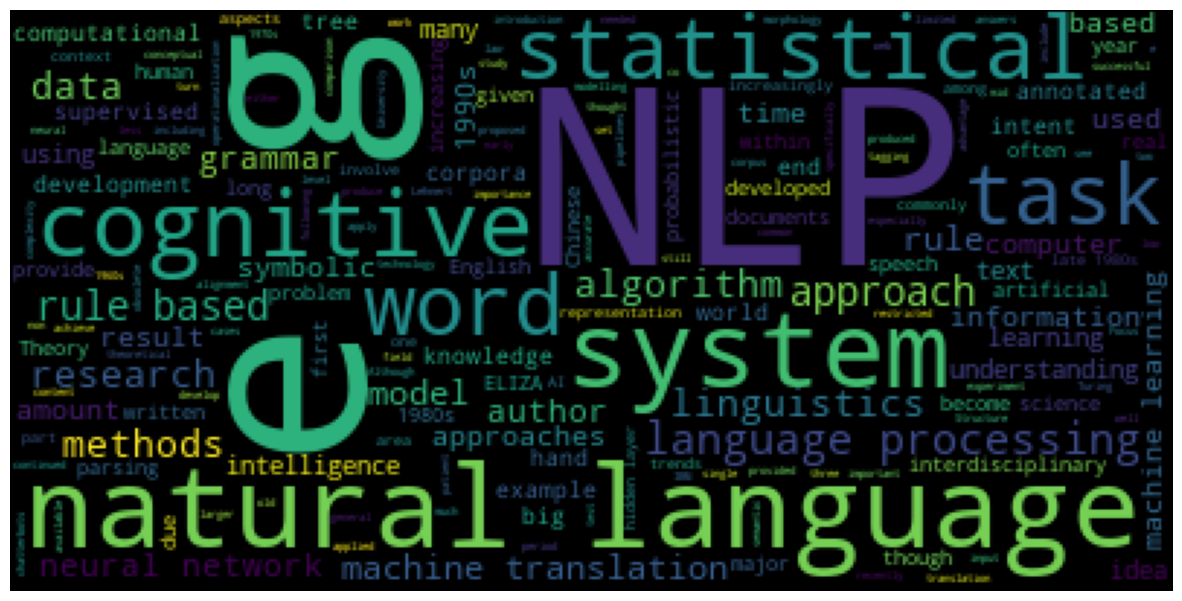

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud()
cloud = cloud.generate(article.cleaned_text)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

### Preprocessing the texts (frequency and word cloud)

In [55]:
def preprocessing(sentence):
    sentence = sentence.lower()
    sentence = sentence.replace('.', '')
    tokens = []
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token)==1)]
    tokens = ' '.join([element for element in tokens])
    return tokens

In [56]:
preprocessing('Test natural language processing it the 1 10 50 ! . ,         b')

'test natural language processing'

In [57]:
article_cleaned = preprocessing(article.cleaned_text)
article_cleaned

'natural language processing nlp interdisciplinary subfield computer science information retrieval primarily concerned giving computers ability support manipulate human language involves processing natural language datasets text corpora speech corpora rule based probabilistic ie statistical recently neural network based machine learning approaches goal computer capable understanding"[citation needed contents documents including contextual nuances language end natural language processing borrows ideas theoretical linguistics technology accurately extract information insights contained documents categorize organize documents natural language processing roots 1940s[1 alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence time articulated problem separate artificial intelligence proposed test includes task involves automated interpretation generation natural language premise symbolic nlp summarized john searle chinese room e

In [58]:
len(article.cleaned_text), len(article_cleaned)

(14780, 10288)

In [60]:
tokens = nltk.tokenize.word_tokenize(article_cleaned)
frequency = nltk.FreqDist(nltk.tokenize.word_tokenize(article_cleaned))
most_common = frequency.most_common(20)
most_common

[('[', 38),
 ('language', 29),
 ('nlp', 20),
 ('eg', 20),
 ('natural', 18),
 ('based', 16),
 ('machine', 14),
 ('cognitive', 14),
 ('processing', 13),
 ('statistical', 13),
 ('systems', 13),
 ('learning', 11),
 ('rule', 10),
 ('tasks', 10),
 ('translation', 10),
 ('approach', 10),
 ('neural', 9),
 ('linguistics', 9),
 ('data', 9),
 ('research', 9)]

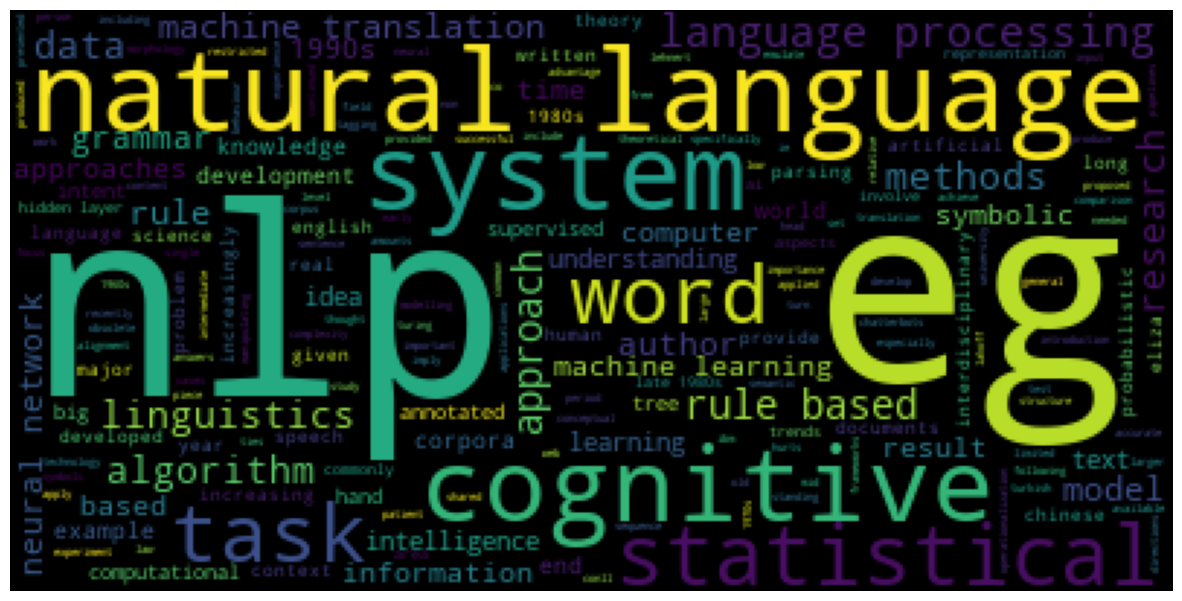

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud()
cloud = cloud.generate(article_cleaned)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

### Text summarization

* sumy library: https://pypi.org/project/sumy/

In [62]:
article.cleaned_text

'Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval. It is primarily concerned with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of "understanding"[citation needed] the contents of documents, including the contextual nuances of the language within them. To this end, natural language processing often borrows ideas from theoretical linguistics. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1940s.[1] Already in 1940, Alan Turing published an article titled "Computing Machinery and Intelligence" wh

In [63]:
# tokenize sentences
original_sentences = [sentence for sentence in nltk.sent_tokenize(article.cleaned_text)]

In [64]:
original_sentences

['Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval.',
 'It is primarily concerned with giving computers the ability to support and manipulate human language.',
 'It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e.',
 'statistical and, most recently, neural network-based) machine learning approaches.',
 'The goal is a computer capable of "understanding"[citation needed] the contents of documents, including the contextual nuances of the language within them.',
 'To this end, natural language processing often borrows ideas from theoretical linguistics.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.',
 'Natural language processing has its roots in the 1940s.',
 '[1] Already in 1940, Alan Turing published an article titled "Computing

In [65]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.sum_basic import SumBasicSummarizer

In [66]:
parser = PlaintextParser.from_string(article.cleaned_text, Tokenizer('english'))

In [67]:
summarizer = SumBasicSummarizer()
summary = summarizer(parser.document, 40)

In [68]:
summary

(<Sentence: It is primarily concerned with giving computers the ability to support and manipulate human language.>,
 <Sentence: To this end, natural language processing often borrows ideas from theoretical linguistics.>,
 <Sentence: The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.>,
 <Sentence: [1] Already in 1940, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.>,
 <Sentence: • 1950s: The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.>,
 <Sentence: [2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, 

In [70]:
best_sentences = []
for sentence in summary:
    best_sentences.append(str(sentence))

In [71]:
best_sentences

['It is primarily concerned with giving computers the ability to support and manipulate human language.',
 'To this end, natural language processing often borrows ideas from theoretical linguistics.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.',
 '[1] Already in 1940, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.',
 '• 1950s: The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.',
 '[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced.',


In [74]:
from IPython.core.display import HTML
text = ''
display(HTML(f'<h1>Summary - {article.title}</h1>'))
for sentence in original_sentences:
    # print(sentence)
    if sentence in best_sentences:
        text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
        text += ' ' + sentence
display(HTML(f"""{text}"""))

### Key Word Search

In [84]:
string = 'Natural language processing (NLP) is an interdisciplinary artificial subfield of computer science and information retrieval. It is primarily concerned with giving computers the ability to support and manipulate human language.'

In [85]:
search_strings = ['artificial', 'computer']
token_list = [nlp(item) for item in search_strings]

In [86]:
token_list

[artificial, computer]

In [87]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH', None, *token_list)

In [88]:
document = nlp(string)
matches = matcher(document)
matches

[(8661325627334373315, 9, 10), (8661325627334373315, 12, 13)]

In [90]:
document[9:10], document[12:13]

(artificial, computer)

In [91]:
document[9-5:10+5]

NLP) is an interdisciplinary artificial subfield of computer science and

In [92]:
document[12-5:13+5]

an interdisciplinary artificial subfield of computer science and information retrieval.

In [93]:
number_of_words = 50 
search_strings_html = ' '.join([ element for element in search_strings ])
search_strings_html

'artificial computer'

In [104]:
marked_text = ''
display(HTML(f'<h1>{search_strings_html.upper()}</h1>'))

# Ensure 'article' and 'nlp' are properly defined elsewhere in your code
document = nlp(article.cleaned_text)
matches = matcher(document)
# print(matches)
display(HTML(f"""<p><strong>Number of matches: </strong>{len(matches)}</p>"""))

for match in matches:
    # print(match)
    start = match[1] - number_of_words
    if start < 0:
        start = 0
    match_text = document[match[1]:match[2]].text
    
    for token in token_list:
        # print(token)
        if document[match[1]:match[2]].similarity(token) == 1.0:
            search_text = token.text
            surrounding_text = document[start:match[2] + number_of_words].text
            highlighted_text = surrounding_text.replace(search_text, f"<mark>{search_text}</mark>")
            marked_text += f"<br /><br />{highlighted_text}"

display(HTML(f"""<blockquote>{marked_text}</blockquote>"""))


/var/folders/py/wtllpsdn24n08dh8trz1pw4m0000gn/T/ipykernel_71204/1868762665.py:20: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  if document[match[1]:match[2]].similarity(token) == 1.0:


### Bag of words

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
sentences = ['This is the first document.',
             'This document is the second document.',
             'And this is the third one.',
             'Is this the first document?']

In [112]:
sentences

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [115]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [116]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [117]:
original_sentences

['Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval.',
 'It is primarily concerned with giving computers the ability to support and manipulate human language.',
 'It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e.',
 'statistical and, most recently, neural network-based) machine learning approaches.',
 'The goal is a computer capable of "understanding"[citation needed] the contents of documents, including the contextual nuances of the language within them.',
 'To this end, natural language processing often borrows ideas from theoretical linguistics.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.',
 'Natural language processing has its roots in the 1940s.',
 '[1] Already in 1940, Alan Turing published an article titled "Computing

In [119]:
vectorizer = CountVectorizer()
X_sentences = vectorizer.fit_transform(original_sentences)
print(vectorizer.get_feature_names_out())

['10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1940' '1940s'
 '1950s' '1954' '1960s' '1964' '1966' '1970s' '1975' '1976' '1977' '1978'
 '1979' '1980s' '1981' '1990s' '1999' '20' '2000s' '2002' '2003' '2006'
 '2007' '2009' '2010' '2010s' '2012' '2015' '2017' '2018' '2020' '2023'
 '21' '22' '40' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '9269353' 'ability' 'able' 'about' 'above'
 'accidentally' 'accuracy' 'accurate' 'accurately' 'achieve' 'acl'
 'acquiring' 'act' 'action' 'additional' 'addressed' 'advance' 'advanced'
 'advantage' 'advantages' 'after' 'age' 'ai' 'aid' 'alan' 'algorithm'
 'algorithms' 'alignment' 'alike' 'all' 'almost' 'along' 'alpac' 'already'
 'also' 'although' 'ambiguous' 'america' 'among' 'amount' 'amounts' 'an'
 'analyze' 'analyzed' 'and' 'annotated' 'announced' 'another' 'answers'
 'anymore' 'apertium' 'apparent' 'applications' 'applied' 'apply'
 'applying' 'approach' 'approaches' 'arabic' 'are' 'area' 'areas' 'art'
 

In [120]:
len(vectorizer.get_feature_names_out())

868

In [121]:
X_sentences.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [122]:
X_sentences.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### TF-IDF

In [123]:
import math 
1 + math.log(4/3)

1.2876820724517808

In [124]:
sentences = ['This is the first document.',
             'This document is the second document.',
             'And this is the third one.',
             'Is this the first document?']

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

In [126]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [128]:
vectorizer.idf_

array([1.91629073, 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.91629073, 1.        , 1.91629073, 1.        ])

In [129]:
X.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [130]:
original_sentences

['Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval.',
 'It is primarily concerned with giving computers the ability to support and manipulate human language.',
 'It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e.',
 'statistical and, most recently, neural network-based) machine learning approaches.',
 'The goal is a computer capable of "understanding"[citation needed] the contents of documents, including the contextual nuances of the language within them.',
 'To this end, natural language processing often borrows ideas from theoretical linguistics.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.',
 'Natural language processing has its roots in the 1940s.',
 '[1] Already in 1940, Alan Turing published an article titled "Computing

In [131]:
vectorizer = TfidfVectorizer()
X_sentences = vectorizer.fit_transform(original_sentences)

In [132]:
print(vectorizer.get_feature_names_out())

['10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1940' '1940s'
 '1950s' '1954' '1960s' '1964' '1966' '1970s' '1975' '1976' '1977' '1978'
 '1979' '1980s' '1981' '1990s' '1999' '20' '2000s' '2002' '2003' '2006'
 '2007' '2009' '2010' '2010s' '2012' '2015' '2017' '2018' '2020' '2023'
 '21' '22' '40' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '9269353' 'ability' 'able' 'about' 'above'
 'accidentally' 'accuracy' 'accurate' 'accurately' 'achieve' 'acl'
 'acquiring' 'act' 'action' 'additional' 'addressed' 'advance' 'advanced'
 'advantage' 'advantages' 'after' 'age' 'ai' 'aid' 'alan' 'algorithm'
 'algorithms' 'alignment' 'alike' 'all' 'almost' 'along' 'alpac' 'already'
 'also' 'although' 'ambiguous' 'america' 'among' 'amount' 'amounts' 'an'
 'analyze' 'analyzed' 'and' 'annotated' 'announced' 'another' 'answers'
 'anymore' 'apertium' 'apparent' 'applications' 'applied' 'apply'
 'applying' 'approach' 'approaches' 'arabic' 'are' 'area' 'areas' 'art'
 

In [133]:
len(vectorizer.get_feature_names_out())

868

In [134]:
X_sentences.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [136]:
X_sentences.toarray()[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3248345 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Cosing similarity 
* Link: https://en.wikipedia.org/wiki/Cosine_similarity
* Step by step calculation: https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/

In [138]:
X_sentences.shape

(80, 868)

In [139]:
type(X_sentences)

scipy.sparse._csr.csr_matrix

In [140]:
X_test_similarity = X_sentences[0:3]
X_test_similarity = X_test_similarity.toarray()

In [141]:
type(X_test_similarity)

numpy.ndarray

In [144]:
import numpy as np 
X_test_similarity = np.concatenate((X_test_similarity, X_test_similarity[0].reshape(1,-1)), axis=0)

In [146]:
X_test_similarity.shape

(4, 868)

In [147]:
from sklearn.metrics.pairwise import cosine_similarity

In [149]:
cosine_similarity(X_test_similarity[0].reshape(1,-1), X_test_similarity[1].reshape(1,-1))

array([[0.07255367]])

In [150]:
original_sentences[0]

'Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval.'

In [151]:
original_sentences[1]

'It is primarily concerned with giving computers the ability to support and manipulate human language.'

In [152]:
cosine_similarity(X_test_similarity[1].reshape(1,-1), X_test_similarity[2].reshape(1,-1))

array([[0.07229136]])

In [153]:
original_sentences[2]

'It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e.'

In [154]:
cosine_similarity(X_test_similarity[0].reshape(1,-1), X_test_similarity[3].reshape(1,-1))

array([[1.]])

In [155]:
cosine_similarity(X_test_similarity[0].reshape(1,-1), X_test_similarity)

array([[1.        , 0.07255367, 0.09258572, 1.        ]])

### Simulating a chatbot

In [156]:
welcome_words_inputs = ('hey', 'hello', 'hi')
welcome_words_outputs = ('hey', 'hello', 'hi', 'how are you?', 'welcome', 'how are you doing?')

In [157]:
'how are you'.split()

['how', 'are', 'you']

In [158]:
import random 
def welcome_message(text):
    for word in text.split():
        if word.lower() in welcome_words_inputs:
            return random.choice(welcome_words_outputs)

In [163]:
welcome_message('hi')

'hello'

In [164]:
welcome_message('hii')

In [186]:
def answer(user_text, threshold = 0.5):
    cleaned_sentences = []
    for sentence in original_sentences:
        cleaned_sentences.append(preprocessing(sentence))
    # print(cleaned_sentences)

    chatbot_answer = ''
    user_text = preprocessing(user_text)
    # print(user_text)
    cleaned_sentences.append(user_text)
    # print(cleaned_sentences[-1])

    tfidf = TfidfVectorizer()
    X_sentences = tfidf.fit_transform(cleaned_sentences)
    # print(X_sentences.toarray()[-1])
    similarity = cosine_similarity(X_sentences[-1], X_sentences)
    # print(similarity)
    sentence_index = similarity.argsort()[0][-2]
    # print(sentence_index)
    # print(similarity[0][sentence_index])

    if similarity[0][sentence_index] < threshold:
        chatbot_answer += 'Sorry, no answer was found!'
    else:
        chatbot_answer += original_sentences[sentence_index]

    return chatbot_answer

In [187]:
answer('What is natural language processing', 0.3)

'Natural language processing has its roots in the 1940s.'

In [193]:
answer('Who is Alan Turing',0.3)

'[1] Already in 1940, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.'

In [196]:
answer('What os NLP', 0.1)

'Natural language processing (NLP) is an interdisciplinary subfield of computer science and information retrieval.'

In [203]:
cont = True 
print("Hello! I am a chatbot and I will answer your questions about natural language processing")
while cont == True:
    user_text = input()
    if user_text != 'quit':
        if welcome_message(user_text) != None:
            print('Chatbot: '+ welcome_message(user_text))
        else:
            print("Chatbot: ")
            print(answer(user_text))
    else:
        cont = False
        print('Chatbot: Bye! I will see you soon')

Hello! I am a chatbot and I will answer your questions about natural language processing
Chatbot: how are you?
Chatbot: 
Sorry, no answer was found!
Chatbot: 
Natural language processing has its roots in the 1940s.
Chatbot: 
Sorry, no answer was found!
Chatbot: 
Sorry, no answer was found!
Chatbot: Bye! I will see you soon
